## Living Cost and Food Survey: Machine Learning K-Means Cluster Analysis

This script contains the following:
    
#### 01. Importing Libraries and Data
#### 02. Clean the Data for K-Means Cluster Analysis
##### Check for Missing Values and Duplicates
##### Cleaning the required columns for the machine learning k-Means clustering analysis
* 'W_ultra_processed_food' column
* 'W_unprocessed_food' column
* 'W_total_expenditure' column
* 'W_total_food_cost' column
* 'W_disposable_income' column
* 'W_total_income' column
* Checking '%ultra_processed_food' column
* Checking '%unprocessed_food' column
* Checking 'no_people' column
* Checking 'no_children' column
* Checking 'no_adult' column

#### 04. Setting up Dummy Columns for 'household_type' and 'income_source'
#### 05. Normalising the Data
#### 06. Concatenate the Dataframes
#### 07. Applying the Elbow Technique
#### 08. K-Means Clustering
##### K-Means with 4 clusters
##### K-Means with 3 clusters
#### 09. Visualising the Clusters
##### Comparing 3 clusters and 4 clusters
##### Comparing with 'W-ultra_processed_food'
##### Comparing with '%ultra_processed_food'
#### 10. Descriptive Analysis of Clusters
#### 11. Isnights and Future Steps
#### 03. Exporting the Cleaned Data Set for Tableau Analysis
---

## 01. Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

# To display the charts in the notebook without the need to "call" them specifically.
%matplotlib inline

In [2]:
# Assign the main project folder path to the variable path
path = r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'
path

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

In [3]:
# Use the os.path.join() function to import the lcf_analysis_regions.pkl file as pandas a dataframe and view first fifteen rows
df_lcf_analysis = pd.read_pickle(os.path.join(path, '02_Data', '02_2_Prepared_Data', 'lcf_analysis_regions.pkl'))
df_lcf_analysis.head(15)

unique_id  no_people household_type              quarter  \
0           1          1          Index     January to March   
1           2          5          Index    July to September   
2           3          2          Index     January to March   
3           4          3          Index    July to September   
4           5          3          Index        April to June   
5           6          4          Index    July to September   
6           7          1          Index    July to September   
7           8          1          Index  October to December   
8           9          2          Index        April to June   
9          10          2          Index        April to June   
10         11          3          Index     January to March   
11         12          2          Index        April to June   
12         13          2          Index     January to March   
13         14          4          Index    July to September   
14         15          3          Index  October to December   

    OECD_disposable_income                    region  total_income  \
0               173.270000                      East    179.684359   
1               333.667857                North West   1117.340000   
2               678.860000                North West   1269.120000   
3               180.000000                South East    391.475289   
4               375.455000                North West    922.302564   
5               254.204000                South East    719.120000   
6               430.716400                      East    545.270577   
7               434.121200                South West    544.506146   
8              1004.068000                     Wales   1863.292000   
9               858.526667                    London   1726.290000   
10              355.655556                South West    757.910000   
11              409.194667             West Midlands    766.252000   
12              354.140000  Yorkshire and the Humber    606.050000   
13              442.766667                      East   1174.920000   
14              359.760000                    London    821.101874   

    OECD_scale  gross_income  weekly_disposable_income  ... W_processed_food  \
0          1.0       173.270                  173.2700  ...         7.026438   
1          2.8      1117.340                  934.2700  ...        39.149384   
2          1.5       732.740                 1018.2900  ...       133.122488   
3          1.6       288.000                  288.0000  ...        61.488466   
4          2.0       911.700                  750.9100  ...        65.180202   
5          2.5       719.120                  635.5100  ...        92.277452   
6          1.0       499.770                  430.7164  ...        13.911332   
7          1.0       523.950                  434.1212  ...        44.027604   
8          1.5      1863.292                 1506.1020  ...       211.472312   
9          1.5         0.000                 1287.7900  ...        66.371239   
10         1.8       757.910                  640.1800  ...       108.652742   
11         1.5       766.252                  613.7920  ...       369.342055   
12         1.5       606.050                  531.2100  ...        11.296576   
13         2.1      1174.920                  929.8100  ...       328.650823   
14         2.0       804.150                  719.5200  ...       109.007296   

    W_ultra_processed_food  %unprocessed_food  %processed_food  \
0               554.833106          37.750485         0.711054   
1               789.311802          17.463803         2.114853   
2               750.798131          27.755326         4.935850   
3               189.774324          28.595960         7.838384   
4               863.439444           7.527209         2.498936   
5              1133.217217           9.429995         1.106466   
6                35.473896          30.412497         4.393459   
7               389.002227          10.708968    

In [4]:
# View the shape of the dataframe
df_lcf_analysis.shape

(26146, 48)

In [5]:
# View the columns in the dataframe
df_lcf_analysis.columns

Index(['unique_id', 'no_people', 'household_type', 'quarter',
       'OECD_disposable_income', 'region', 'total_income', 'OECD_scale',
       'gross_income', 'weekly_disposable_income', 'income_source',
       'adult_food_cost', 'child_food_cost', 'total_food_cost',
       'adult_total_expenditure', 'child_total_expenditure',
       'total_expenditure', 'eng_rural_urb', 'scot_rural_urb',
       'quarterly_weight', 'year', 'no_children', 'no_adult',
       'unprocessed_food', 'processed_food', 'ultra_processed_food',
       'no_households', 'W_OECD_disposable_income', 'W_total_income',
       'W_gross_income', 'W_disposable_income', 'W_adult_food_cost',
       'W_child_food_cost', 'W_total_food_cost', 'W_adult_total_expenditure',
       'W_child_total_expenditure', 'W_total_expenditure',
       'W_unprocessed_food', 'W_processed_food', 'W_ultra_processed_food',
       '%unprocessed_food', '%processed_food', '%ultra_processed_food',
       'rW_total_food_cost', 'rW_ultra_processed_food',

---

## 02. Clean the Data for K-Means Cluster Analysis

### Check for Missing Values and Duplicates

In [6]:
# Check for missing values
df_lcf_analysis.isnull().sum()

unique_id                        0
no_people                        0
household_type                   0
quarter                          0
OECD_disposable_income           0
region                           0
total_income                     0
OECD_scale                       0
gross_income                     0
weekly_disposable_income         0
income_source                    0
adult_food_cost                  0
child_food_cost                  0
total_food_cost                  0
adult_total_expenditure          0
child_total_expenditure          0
total_expenditure                0
eng_rural_urb                 4787
scot_rural_urb               23079
quarterly_weight                 0
year                             0
no_children                      0
no_adult                         0
unprocessed_food                 0
processed_food                   0
ultra_processed_food             0
no_households                    0
W_OECD_disposable_income         0
W_total_income      

No missing values in the columns for the machine learning regression analysis.

In [7]:
# Check for duplicates
dups = df_lcf_analysis.duplicated()
dups.shape

(26146,)

No duplicates found.

In [8]:
# Check the data type
df_lcf_analysis.dtypes

unique_id                      int64
no_people                      int64
household_type                object
quarter                       object
OECD_disposable_income       float64
region                        object
total_income                 float64
OECD_scale                   float64
gross_income                 float64
weekly_disposable_income     float64
income_source                 object
adult_food_cost              float64
child_food_cost              float64
total_food_cost              float64
adult_total_expenditure      float64
child_total_expenditure      float64
total_expenditure            float64
eng_rural_urb                 object
scot_rural_urb                object
quarterly_weight             float64
year                           int64
no_children                    int64
no_adult                       int64
unprocessed_food             float64
processed_food               float64
ultra_processed_food         float64
no_households                  int32
W

### Cleaning the required columns for the machine learning k-Means clustering analysis 

#### 'W_ultra_processed_food' column

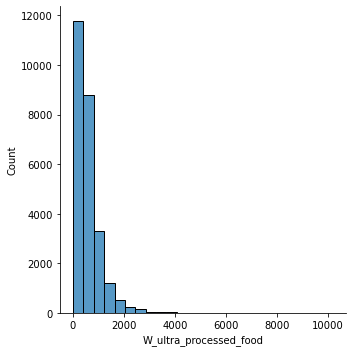

In [9]:
# Check for extreme values
sns.displot(df_lcf_analysis['W_ultra_processed_food'], bins=25) 

In [10]:
# check the mean, median and max values
df_lcf_analysis['W_ultra_processed_food'].describe()

count    26146.000000
mean       577.726741
std        504.412742
min          0.000000
25%        253.260366
50%        447.743521
75%        749.316521
max      10198.476554
Name: W_ultra_processed_food, dtype: float64

The column contains outliers. Remove values above 5000

In [11]:
# Clean the extreme values from the "W_ultra_processed_food" variable
df_lcf_analysis = df_lcf_analysis.loc[df_lcf_analysis['W_ultra_processed_food'] <= 5000] 

In [12]:
# check the mean, median and max values in the new column
df_lcf_analysis['W_ultra_processed_food'].describe()

count    26133.000000
mean       574.678612
std        484.288736
min          0.000000
25%        253.113555
50%        447.583064
75%        748.633455
max       4840.650227
Name: W_ultra_processed_food, dtype: float64

#### 'W_unprocessed_food' column

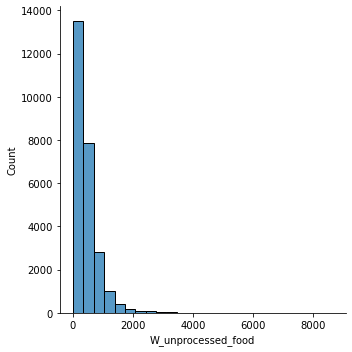

In [13]:
# Check for extreme values
sns.displot(df_lcf_analysis['W_unprocessed_food'], bins=25) 

In [14]:
# check the mean, median and max values
df_lcf_analysis['W_unprocessed_food'].describe()

count    26133.000000
mean       443.702651
std        426.841680
min          0.000000
25%        172.159068
50%        333.848491
75%        577.638791
max       8650.517599
Name: W_unprocessed_food, dtype: float64

The column contains outliers. Remove values above 4000

In [15]:
# Clean the extreme values from the "W_unprocessed_food" variable
df_lcf_analysis = df_lcf_analysis.loc[df_lcf_analysis['W_unprocessed_food'] <= 4000] 

In [16]:
# check the mean, median and max values in the new column
df_lcf_analysis['W_unprocessed_food'].describe()

count    26113.000000
mean       440.254423
std        407.283232
min          0.000000
25%        171.989188
50%        333.563465
75%        576.723004
max       3998.965905
Name: W_unprocessed_food, dtype: float64

#### 'W_total_expenditure' column

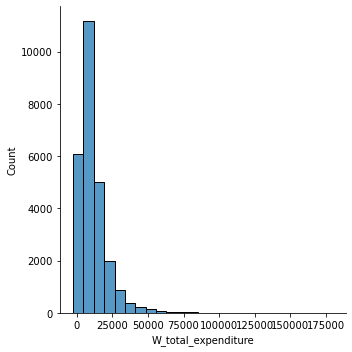

In [17]:
# Check for extreme values
sns.displot(df_lcf_analysis['W_total_expenditure'], bins=25) 

In [18]:
# check the mean, median and max values
df_lcf_analysis['W_total_expenditure'].describe()

count     26113.000000
mean      11507.595659
std       10600.233752
min       -2632.828945
25%        4876.678205
50%        8592.529060
75%       14613.370787
max      179804.147713
Name: W_total_expenditure, dtype: float64

The column contains outliers. Remove values above 100000

In [19]:
# Clean the extreme values from the "W_ultra_processed_food" variable
df_lcf_analysis = df_lcf_analysis.loc[df_lcf_analysis['W_total_expenditure'] <= 100000] 

In [20]:
# check the mean, median and max values in the new column
df_lcf_analysis['W_total_expenditure'].describe()

count    26095.000000
mean     11431.073065
std      10179.170493
min      -2632.828945
25%       4875.596672
50%       8586.184433
75%      14590.687753
max      99954.564060
Name: W_total_expenditure, dtype: float64

#### 'W_total_food_cost' column

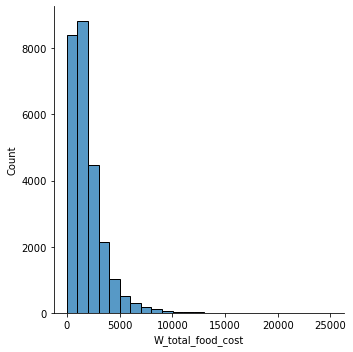

In [21]:
# Check for extreme values
sns.displot(df_lcf_analysis['W_total_food_cost'], bins=25) 

In [22]:
# check the mean, median and max values
df_lcf_analysis['W_total_food_cost'].describe()

count    26095.000000
mean      1892.044648
std       1605.851069
min          0.432860
25%        828.644853
50%       1461.999540
75%       2442.451771
max      25067.537372
Name: W_total_food_cost, dtype: float64

The column contains outliers. Remove values above 15000

In [23]:
# Clean the extreme values from the "W_ultra_processed_food" variable
df_lcf_analysis = df_lcf_analysis.loc[df_lcf_analysis['W_total_food_cost'] <= 15000] 

In [24]:
# check the mean, median and max values in the new column
df_lcf_analysis['W_total_food_cost'].describe()

count    26085.000000
mean      1885.489369
std       1569.783762
min          0.432860
25%        828.301607
50%       1461.370474
75%       2439.531561
max      14941.614836
Name: W_total_food_cost, dtype: float64

#### 'W_disposable_income' column

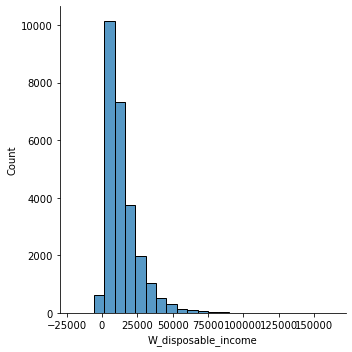

In [25]:
# Check for extreme values
sns.displot(df_lcf_analysis['W_disposable_income'], bins=25) 

In [26]:
# check the mean, median and max values
df_lcf_analysis['W_disposable_income'].describe()

count     26085.000000
mean      14093.065138
std       11857.400140
min      -20493.301791
25%        6053.392270
50%       10747.369473
75%       18358.884690
max      163239.936800
Name: W_disposable_income, dtype: float64

Remove the extreme values above 100000 and below -1000

In [27]:
# Clean the extreme values from the "W_disposable_income" variable
df_lcf_analysis = df_lcf_analysis.loc[(df_lcf_analysis['W_disposable_income'] >= -1000) & (df_lcf_analysis['W_disposable_income'] <= 100000)] 

In [28]:
# check the mean, median and max values in the new column
df_lcf_analysis['W_disposable_income'].describe()

count    26059.000000
mean     14061.464868
std      11630.138076
min       -916.280261
25%       6058.153440
50%      10748.001047
75%      18354.586728
max      99460.843385
Name: W_disposable_income, dtype: float64

#### 'W_total_income' column

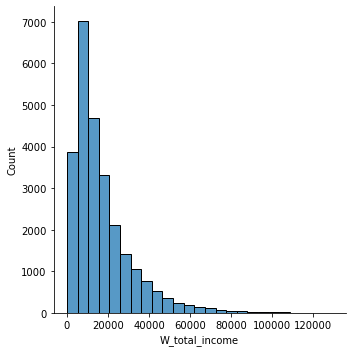

In [29]:
# Check for extreme values
sns.displot(df_lcf_analysis['W_total_income'], bins=25) 

In [30]:
# check the mean, median and max values
df_lcf_analysis['W_total_income'].describe()

count     26059.000000
mean      16958.587323
std       14676.044185
min           0.000000
25%        6970.187488
50%       12457.853558
75%       22017.864137
max      129170.583438
Name: W_total_income, dtype: float64

Remove the extreme values above 120000

In [31]:
# Clean the extreme values from the "W_disposable_income" variable
df_lcf_analysis = df_lcf_analysis.loc[df_lcf_analysis['W_total_income'] <= 120000] 

In [32]:
# check the mean, median and max values in the new column
df_lcf_analysis['W_total_income'].describe()

count     26055.000000
mean      16942.233220
std       14617.629194
min           0.000000
25%        6969.044649
50%       12453.496491
75%       22013.586556
max      117226.992697
Name: W_total_income, dtype: float64

#### Checking '%ultra_processed_food' column

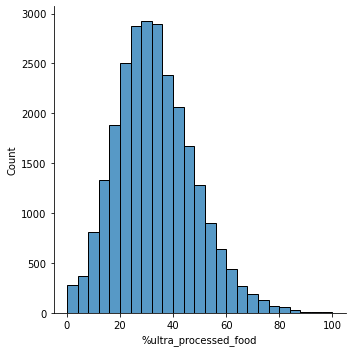

In [33]:
# Check for extreme values
sns.displot(df_lcf_analysis['%ultra_processed_food'], bins=25) 

#### Checking '%unprocessed_food' column

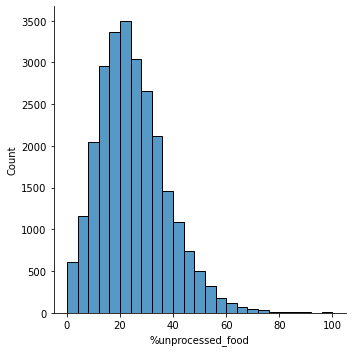

In [34]:
# Check for extreme values
sns.displot(df_lcf_analysis['%unprocessed_food'], bins=25) 

#### Checking 'no_people' column

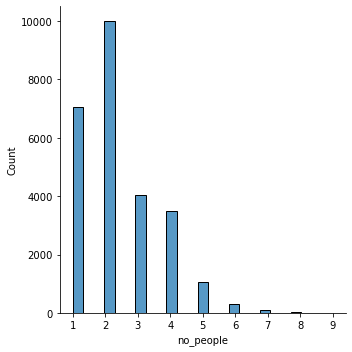

In [35]:
# Check for extreme values
sns.displot(df_lcf_analysis['no_people'], bins=25) 

#### Checking 'no_children' column

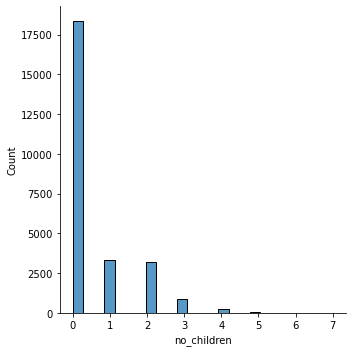

In [36]:
# Check for extreme values
sns.displot(df_lcf_analysis['no_children'], bins=25) 

#### Checking 'no_adult' column

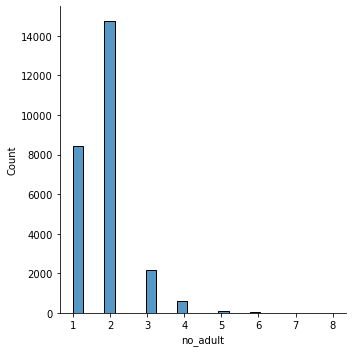

In [37]:
# Check for extreme values
sns.displot(df_lcf_analysis['no_adult'], bins=25) 

In [38]:
# View the dataframe before exporting
df_lcf_analysis.head(10)

unique_id  no_people household_type              quarter  \
0          1          1          Index     January to March   
1          2          5          Index    July to September   
2          3          2          Index     January to March   
3          4          3          Index    July to September   
4          5          3          Index        April to June   
5          6          4          Index    July to September   
6          7          1          Index    July to September   
7          8          1          Index  October to December   
8          9          2          Index        April to June   
9         10          2          Index        April to June   

   OECD_disposable_income      region  total_income  OECD_scale  gross_income  \
0              173.270000        East    179.684359         1.0       173.270   
1              333.667857  North West   1117.340000         2.8      1117.340   
2              678.860000  North West   1269.120000         1.5       732.740   
3              180.000000  South East    391.475289         1.6       288.000   
4              375.455000  North West    922.302564         2.0       911.700   
5              254.204000  South East    719.120000         2.5       719.120   
6              430.716400        East    545.270577         1.0       499.770   
7              434.121200  South West    544.506146         1.0       523.950   
8             1004.068000       Wales   1863.292000         1.5      1863.292   
9              858.526667      London   1726.290000         1.5         0.000   

   weekly_disposable_income  ... W_processed_food  W_ultra_processed_food  \
0                  173.2700  ...         7.026438              554.833106   
1                  934.2700  ...        39.149384              789.311802   
2                 1018.2900  ...       133.122488              750.798131   
3                  288.0000  ...        61.488466              189.774324   
4                  750.9100  ...        65.180202              863.439444   
5                  635.5100  ...        92.277452             1133.217217   
6                  430.7164  ...        13.911332               35.473896   
7                  434.1212  ...        44.027604              389.002227   
8                 1506.1020  ...       211.472312              313.551775   
9                 1287.7900  ...        66.371239              661.261182   

   %unprocessed_food  %processed_food  %ultra_processed_food  \
0          37.750485         0.711054              56.147382   
1          17.463803         2.114853              42.638686   
2          27.755326         4.935850              27.837721   
3          28.595960         7.838384              24.191919   
4           7.527209         2.498936              33.103302   
5           9.429995         1.106466              13.588004   
6          30.412497         4.393459              11.203320   
7          10.708968         5.497652              48.574047   
8          26.801342        18.075936              26.801342   
9          10.939538         0.937142               9.336812   

   rW_total_food_cost  rW_ultra_processed_food r%ultra_processed_food  \
0         1939.661948               617.777123              31.849732   
1         1759.924158               551.273975              31.323735   
2         1729.658686               548.335454              31.701946   
3         2055.044167               615.104431              29.931446   
4         1759.924158               551.273975              31.323735   
5         2055.044167               615.104431              29.931446   
6         1908.358848               561.560598              29.426363   
7         1777.917498               544.943729              30.650676   
8         1683.241202               568.144770              33.753022   
9         2807.363772               737.556100              26.272196   

  rW_unprocessed_food  r%unprocessed_food  
0          459.5

In [39]:
# View the shape of the dataframe
df_lcf_analysis.shape

(26055, 48)

## 03. Setting up Dummy Columns for 'household_type', 'income_source'

In [40]:
df_lcf_analysis_dummies = pd.get_dummies(df_lcf_analysis[['household_type', 'income_source']])
df_lcf_analysis_dummies

household_type_Index  household_type_Pensioner  household_type_Wealthy  \
0                         1                         0                       0   
1                         1                         0                       0   
2                         1                         0                       0   
3                         1                         0                       0   
4                         1                         0                       0   
...                     ...                       ...                     ...   
26146                     1                         0                       0   
26147                     1                         0                       0   
26148                     1                         0                       0   
26149                     1                         0                       0   
26150                     1                         0                       0   

       income_source_Annuities pensions  income_source_Income-other sources  \
0                                     0                                   0   
1                                     0                                   0   
2                                     0                                   0   
3                                     0                                   0   
4                                     0                                   0   
...                                 ...                                 ...   
26146                                 1                                   0   
26147                                 1                                   0   
26148                                 0                                   0   
26149                                 0                                   0   
26150                                 0                                   0   

       income_source_Investment income  income_source_Not recorded  \
0                                    0                           0   
1                                    0                           0   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   
...                                ...                         ...   
26146                                0                           0   
26147                                0                           0   
26148                                0                           0   
26149                                0                           0   
26150                                0                           0   

       income_source_Self-employment inc.  income_source_Social sec. benefits  \
0                                       1                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   1   
4                                       0                                   0   
...                                   ...                                 ...   
26146                                   0                                   0   
26147                                   0                                   0   
26148                                   0                                   0   
26149                                   0                                   0   
26150                                   0                                   0   

       income_source_Wages salaries  
0                                 0  
1                                 1  
2                                 1  
3                                 0  
4                                 1  
...                             ...  
26146

## 04. Normalising the Data

In [41]:
df_lcf_analysis_sub = df_lcf_analysis[['no_people', 'household_type', 'income_source', 'no_children', 'no_adult',
       'W_total_income', 'W_disposable_income', 'W_total_food_cost', 'W_total_expenditure',
       'W_unprocessed_food', 'W_ultra_processed_food', '%unprocessed_food', '%ultra_processed_food']]
df_lcf_analysis_sub.head(20)

no_people household_type         income_source  no_children  no_adult  \
0           1          Index  Self-employment inc.            0         1   
1           5          Index        Wages salaries            1         4   
2           2          Index        Wages salaries            0         2   
3           3          Index  Social sec. benefits            2         1   
4           3          Index        Wages salaries            1         2   
5           4          Index        Wages salaries            0         4   
6           1          Index        Wages salaries            0         1   
7           1          Index        Wages salaries            0         1   
8           2          Index    Annuities pensions            0         2   
9           2          Index        Wages salaries            0         2   
10          3          Index        Wages salaries            1         2   
11          2          Index        Wages salaries            0         2   
12          2          Index        Wages salaries            0         2   
13          4          Index        Wages salaries            2         2   
14          3          Index        Wages salaries            0         3   
15          3          Index        Wages salaries            0         3   
16          4          Index        Wages salaries            2         2   
17          4          Index        Wages salaries            2         2   
18          2          Index  Social sec. benefits            0         2   
19          7          Index  Social sec. benefits            3         4   

    W_total_income  W_disposable_income  W_total_food_cost  \
0      4591.058300          4427.167040         988.172709   
1     33648.593987         28135.457340        1851.163542   
2     26859.842833         21551.239724        2697.053132   
3      6203.921362          4564.092304         784.453365   
4     14626.731813         11908.629135        2608.318219   
5     30026.498333         26535.404321        8339.835694   
6      8428.266583          6657.598621         316.637369   
7      9988.875422          7963.881800         800.843774   
8     28688.363035         23188.851207        1169.910709   
9     65100.003791         48563.760366        7082.301474   
10    22561.369682         19056.797829        2899.539805   
11    11223.838519          8990.648366        1430.934973   
12    16108.917327         14119.656750        1401.307023   
13    14648.650402         11592.671526        2162.911408   
14    22517.256637         19731.554641        3592.990173   
15    39300.319876         30261.092395        4516.040851   
16    10188.858435          8687.464657        1237.559703   
17    12717.920892          9814.782152        2258.484065   
18    11871.318200         10748.001047        1818.728179   
19    28727.624062         25009.760223        3671.390541   

    W_total_expenditure  W_unprocessed_food  W_ultra_processed_food  \
0           2511.076176          373.039988              554.833106   
1          13300.786598          323.283563              789.311802   
2          16984.800931          748.575896              750.798131   
3           9216.451707          224.321967              189.774324   
4          10127.284984          196.333554              863.439444   
5          44028.146914          786.446068             1133.217217   
6           4992.797215           96.297330               35.473896   
7           5060.872092           85.762104              389.002227   
8           3590.546326          313.551775              313.551775   
9          25763.427321          774.771086              661.261182   
10         15791.853031          551.152194              773.369377   
11          8430.413852          780.283612              202.577855   
12         15916.762192          393.785348              453.590750   
13         11726.938715          419.478639              243.184154   
14          8451.9

In [42]:
df_lcf_analysis_zscore = df_lcf_analysis_sub.select_dtypes(include='number').apply(stats.zscore)
df_lcf_analysis_zscore.head(20)

no_people  no_children  no_adult  W_total_income  W_disposable_income  \
0   -1.087206    -0.562955 -1.134368       -0.844967            -0.830408   
1    2.145288     0.513343  3.004155        1.142913             1.215736   
2   -0.279083    -0.562955  0.245140        0.678482             0.647485   
3    0.529041     1.589641 -1.134368       -0.734628            -0.818591   
4    0.529041     0.513343  0.245140       -0.158408            -0.184721   
5    1.337164    -0.562955  3.004155        0.895119             1.077644   
6   -1.087206    -0.562955 -1.134368       -0.582456            -0.637911   
7   -1.087206    -0.562955 -1.134368       -0.475692            -0.525172   
8   -0.279083    -0.562955  0.245140        0.803575             0.788819   
9   -0.279083    -0.562955  0.245140        3.294563             2.978801   
10   0.529041     0.513343  0.245140        0.384416             0.432202   
11  -0.279083    -0.562955  0.245140       -0.391206            -0.436557   
12  -0.279083    -0.562955  0.245140       -0.057009             0.006102   
13   1.337164     1.589641  0.245140       -0.156908            -0.211989   
14   0.529041    -0.562955  1.624647        0.381398             0.490437   
15   0.529041    -0.562955  1.624647        1.529558             1.399189   
16   1.337164     1.589641  0.245140       -0.462011            -0.462723   
17   1.337164     1.589641  0.245140       -0.288993            -0.365430   
18  -0.279083    -0.562955  0.245140       -0.346911            -0.284889   
19   3.761535     2.665938  3.004155        0.806260             0.945973   

    W_total_food_cost  W_total_expenditure  W_unprocessed_food  \
0           -0.573613            -0.883829           -0.161207   
1           -0.018782             0.192029           -0.285507   
2            0.525056             0.559367            0.776948   
3           -0.704588            -0.215226           -0.532730   
4            0.468006            -0.124406           -0.602650   
5            4.152899             3.255898            0.871555   
6           -1.005355            -0.636373           -0.852559   
7           -0.694050            -0.629585           -0.878877   
8           -0.456771            -0.776194           -0.309819   
9            3.344408             1.434697            0.842389   
10           0.655238             0.440416            0.283749   
11          -0.288954            -0.293603            0.856160   
12          -0.308002             0.452871           -0.109381   
13           0.181647             0.035098           -0.045195   
14           1.101069            -0.291459            3.285223   
15           1.694515             1.163339            0.933925   
16          -0.413278            -0.476420           -0.213407   
17           0.243092            -0.371207           -0.293678   
18          -0.039635            -0.494704            0.094268   
19           1.151474             0.053362            0.825208   

    W_ultra_processed_food  %unprocessed_food  %ultra_processed_food  
0                -0.033050           1.000646               1.551075  
1                 0.462468          -0.577175               0.633236  
2                 0.381078           0.223261              -0.372405  
3                -0.804521           0.288642              -0.620117  
4                 0.619121          -1.350005              -0.014639  
5                 1.189236          -1.202014              -1.340592  
6                -1.130601           0.429925              -1.502618  
7                -0.383497          -1.102540               1.036510  
8                -0.542945           0.149064              -0.442821  
9                 0.191862          -1.084607              -1.629437  
10                0.428777          -0.457052              -0.451599  
11               -0.777464           2.305664              -1.301930  
12               -0.247004           0.250168              -0.064522  
13   

## 05. Concatenate the Dataframes

In [43]:
# Create a list that contains the two dataframes  and check the output
frames = [df_lcf_analysis_zscore, df_lcf_analysis_dummies]
frames

[       no_people  no_children  no_adult  W_total_income  W_disposable_income  \
 0      -1.087206    -0.562955 -1.134368       -0.844967            -0.830408   
 1       2.145288     0.513343  3.004155        1.142913             1.215736   
 2      -0.279083    -0.562955  0.245140        0.678482             0.647485   
 3       0.529041     1.589641 -1.134368       -0.734628            -0.818591   
 4       0.529041     0.513343  0.245140       -0.158408            -0.184721   
 ...          ...          ...       ...             ...                  ...   
 26146  -0.279083    -0.562955  0.245140       -0.305358            -0.222363   
 26147  -1.087206    -0.562955 -1.134368       -0.344183            -0.342032   
 26148  -0.279083    -0.562955  0.245140       -0.627081            -0.580038   
 26149  -1.087206    -0.562955 -1.134368        4.064086             3.258839   
 26150  -0.279083    -0.562955  0.245140       -0.291571            -0.293435   
 
        W_total_food_cost 

In [44]:
# Check the data types to be sure it is a list
type(frames)

list

In [45]:
# use pd.concat to join the dataframes for the 5 years under the column headings
df_lcf_analysis_kmeans = pd.concat(frames, axis = 1)
df_lcf_analysis_kmeans.head()

no_people  no_children  no_adult  W_total_income  W_disposable_income  \
0  -1.087206    -0.562955 -1.134368       -0.844967            -0.830408   
1   2.145288     0.513343  3.004155        1.142913             1.215736   
2  -0.279083    -0.562955  0.245140        0.678482             0.647485   
3   0.529041     1.589641 -1.134368       -0.734628            -0.818591   
4   0.529041     0.513343  0.245140       -0.158408            -0.184721   

   W_total_food_cost  W_total_expenditure  W_unprocessed_food  \
0          -0.573613            -0.883829           -0.161207   
1          -0.018782             0.192029           -0.285507   
2           0.525056             0.559367            0.776948   
3          -0.704588            -0.215226           -0.532730   
4           0.468006            -0.124406           -0.602650   

   W_ultra_processed_food  %unprocessed_food  ...  household_type_Index  \
0               -0.033050           1.000646  ...                     1   
1                0.462468          -0.577175  ...                     1   
2                0.381078           0.223261  ...                     1   
3               -0.804521           0.288642  ...                     1   
4                0.619121          -1.350005  ...                     1   

   household_type_Pensioner  household_type_Wealthy  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   income_source_Annuities pensions  income_source_Income-other sources  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   

   income_source_Investment income  income_source_Not recorded  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   

   income_source_Self-employment inc.  income_source_Social sec. benefits  \
0                                   1                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   1   
4                                   0                                   0   

   income_source_Wages salaries  
0                             0  
1                             1  
2                             1  
3                             0  
4                             1  

[5 rows x 21 columns]

In [46]:
# Check the last five rows
df_lcf_analysis_kmeans.tail()

no_people  no_children  no_adult  W_total_income  W_disposable_income  \
26146  -0.279083    -0.562955  0.245140       -0.305358            -0.222363   
26147  -1.087206    -0.562955 -1.134368       -0.344183            -0.342032   
26148  -0.279083    -0.562955  0.245140       -0.627081            -0.580038   
26149  -1.087206    -0.562955 -1.134368        4.064086             3.258839   
26150  -0.279083    -0.562955  0.245140       -0.291571            -0.293435   

       W_total_food_cost  W_total_expenditure  W_unprocessed_food  \
26146           0.099212            -0.251030           -0.004752   
26147          -0.355110            -0.425581           -0.239074   
26148           0.028233             0.205191            0.322050   
26149          -0.803628             4.803997           -1.093126   
26150           0.070001            -0.108720            0.662965   

       W_ultra_processed_food  %unprocessed_food  ...  household_type_Index  \
26146                1.173398          -0.270102  ...                     1   
26147               -0.623414           0.066717  ...                     1   
26148               -0.801827           0.354177  ...                     1   
26149               -1.205567          -1.935443  ...                     1   
26150                0.403619           0.812956  ...                     1   

       household_type_Pensioner  household_type_Wealthy  \
26146                         0                       0   
26147                         0                       0   
26148                         0                       0   
26149                         0                       0   
26150                         0                       0   

       income_source_Annuities pensions  income_source_Income-other sources  \
26146                                 1                                   0   
26147                                 1                                   0   
26148                                 0                                   0   
26149                                 0                                   0   
26150                                 0                                   0   

       income_source_Investment income  income_source_Not recorded  \
26146                                0                           0   
26147                                0                           0   
26148                                0                           0   
26149                                0                           0   
26150                                0                           0   

       income_source_Self-employment inc.  income_source_Social sec. benefits  \
26146                                   0                                   0   
26147                                   0                                   0   
26148                                   0                                   0   
26149                                   0                                   0   
26150                                   0                                   0   

       income_source_Wages salaries  
26146                             0  
26147                             0  
26148                             1  
26149                             1  
26150                             1  

[5 rows x 21 columns]

In [47]:
# Check the shape of the dataframe
df_lcf_analysis_kmeans.shape

(26055, 21)

In [48]:
# Check the columns
df_lcf_analysis_kmeans.columns

Index(['no_people', 'no_children', 'no_adult', 'W_total_income',
       'W_disposable_income', 'W_total_food_cost', 'W_total_expenditure',
       'W_unprocessed_food', 'W_ultra_processed_food', '%unprocessed_food',
       '%ultra_processed_food', 'household_type_Index',
       'household_type_Pensioner', 'household_type_Wealthy',
       'income_source_Annuities pensions',
       'income_source_Income-other sources', 'income_source_Investment income',
       'income_source_Not recorded', 'income_source_Self-employment inc.',
       'income_source_Social sec. benefits', 'income_source_Wages salaries'],
      dtype='object')

## 06. Applying the Elbow Technique

In [49]:
num_cl = range (1, 10) # define the range of potential clusters in the data
kmeans = [KMeans (n_clusters=i) for i in num_cl]

In [50]:
score = [kmeans[i].fit(df_lcf_analysis_kmeans).score(df_lcf_analysis_kmeans) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-306350.4181539054,
 -223055.8663022124,
 -192558.7111401161,
 -172808.2036657416,
 -161091.7878406728,
 -150051.01032460577,
 -142738.21234308765,
 -135999.77455430827,
 -131590.54977301945]

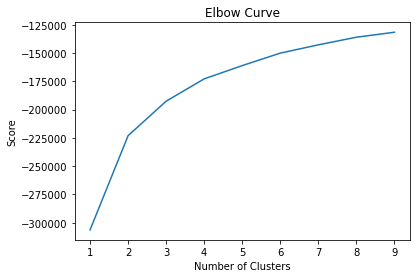

In [51]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**The elbow or breaking point is around 3. Confirm by trying 3 and 4 clusters.**

## 07. K-Means Clustering

### K-Means with 4 clusters

In [52]:
# Create new dataframe
df_lcf_analysis_kmeans4 = df_lcf_analysis_kmeans

In [53]:
# Create the k-means object the n_jobs argument has been depreciated.
kmeans4 = KMeans(n_clusters = 4) 

In [54]:
# Fit the k-means object to the data.
kmeans4.fit(df_lcf_analysis_kmeans4)

KMeans(n_clusters=4)

In [55]:
df_lcf_analysis_kmeans4['clusters'] = kmeans4.fit_predict(df_lcf_analysis_kmeans4)
df_lcf_analysis_kmeans4.head()

no_people  no_children  no_adult  W_total_income  W_disposable_income  \
0  -1.087206    -0.562955 -1.134368       -0.844967            -0.830408   
1   2.145288     0.513343  3.004155        1.142913             1.215736   
2  -0.279083    -0.562955  0.245140        0.678482             0.647485   
3   0.529041     1.589641 -1.134368       -0.734628            -0.818591   
4   0.529041     0.513343  0.245140       -0.158408            -0.184721   

   W_total_food_cost  W_total_expenditure  W_unprocessed_food  \
0          -0.573613            -0.883829           -0.161207   
1          -0.018782             0.192029           -0.285507   
2           0.525056             0.559367            0.776948   
3          -0.704588            -0.215226           -0.532730   
4           0.468006            -0.124406           -0.602650   

   W_ultra_processed_food  %unprocessed_food  ...  household_type_Pensioner  \
0               -0.033050           1.000646  ...                         0   
1                0.462468          -0.577175  ...                         0   
2                0.381078           0.223261  ...                         0   
3               -0.804521           0.288642  ...                         0   
4                0.619121          -1.350005  ...                         0   

   household_type_Wealthy  income_source_Annuities pensions  \
0                       0                                 0   
1                       0                                 0   
2                       0                                 0   
3                       0                                 0   
4                       0                                 0   

   income_source_Income-other sources  income_source_Investment income  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   

   income_source_Not recorded  income_source_Self-employment inc.  \
0                           0                                   1   
1                           0                                   0   
2                           0                                   0   
3                           0                                   0   
4                           0                                   0   

   income_source_Social sec. benefits  income_source_Wages salaries  clusters  
0                                   0                             0         1  
1                                   0                             1         0  
2                                   0                             1         3  
3                                   1                             0         1  
4                                   0                             1         3  

[5 rows x 22 columns]

In [56]:
df_lcf_analysis_kmeans4['clusters'].value_counts()

1    12176
3     7881
0     3861
2     2137
Name: clusters, dtype: int64

### K-Means with 3 clusters

In [57]:
# Create the k-means object the n_jobs argument has been depreciated.
kmeans = KMeans(n_clusters = 3) 

In [58]:
# Fit the k-means object to the data.
kmeans.fit(df_lcf_analysis_kmeans)

KMeans(n_clusters=3)

In [59]:
df_lcf_analysis_kmeans['clusters'] = kmeans.fit_predict(df_lcf_analysis_kmeans)
df_lcf_analysis_kmeans.head()

no_people  no_children  no_adult  W_total_income  W_disposable_income  \
0  -1.087206    -0.562955 -1.134368       -0.844967            -0.830408   
1   2.145288     0.513343  3.004155        1.142913             1.215736   
2  -0.279083    -0.562955  0.245140        0.678482             0.647485   
3   0.529041     1.589641 -1.134368       -0.734628            -0.818591   
4   0.529041     0.513343  0.245140       -0.158408            -0.184721   

   W_total_food_cost  W_total_expenditure  W_unprocessed_food  \
0          -0.573613            -0.883829           -0.161207   
1          -0.018782             0.192029           -0.285507   
2           0.525056             0.559367            0.776948   
3          -0.704588            -0.215226           -0.532730   
4           0.468006            -0.124406           -0.602650   

   W_ultra_processed_food  %unprocessed_food  ...  household_type_Pensioner  \
0               -0.033050           1.000646  ...                         0   
1                0.462468          -0.577175  ...                         0   
2                0.381078           0.223261  ...                         0   
3               -0.804521           0.288642  ...                         0   
4                0.619121          -1.350005  ...                         0   

   household_type_Wealthy  income_source_Annuities pensions  \
0                       0                                 0   
1                       0                                 0   
2                       0                                 0   
3                       0                                 0   
4                       0                                 0   

   income_source_Income-other sources  income_source_Investment income  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   

   income_source_Not recorded  income_source_Self-employment inc.  \
0                           0                                   1   
1                           0                                   0   
2                           0                                   0   
3                           0                                   0   
4                           0                                   0   

   income_source_Social sec. benefits  income_source_Wages salaries  clusters  
0                                   0                             0         1  
1                                   0                             1         2  
2                                   0                             1         0  
3                                   1                             0         1  
4                                   0                             1         0  

[5 rows x 22 columns]

In [60]:
df_lcf_analysis_kmeans['clusters'].value_counts()

1    12293
0     9853
2     3909
Name: clusters, dtype: int64

## 08. Visualising the Clusters

In [61]:
# Change the working directory and show directory path
os.chdir(r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/04_Analysis')
os.getcwd()

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/04_Analysis'

### Comparing 3 clusters and 4 clusters

<Figure size 432x288 with 0 Axes>

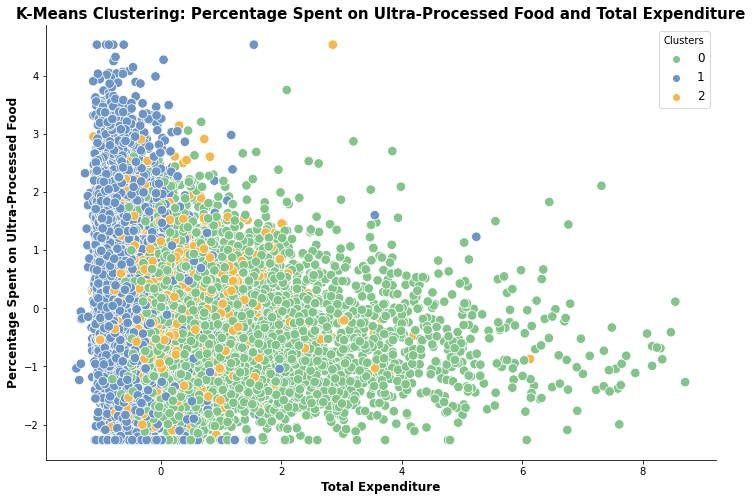

In [62]:
# Plot the clusters for the "%ultra_processed_food" and "W_total_expenditure" variables.

# define data 
df = df_lcf_analysis_kmeans
X = 'W_total_expenditure'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Total Expenditure', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total Expenditure' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_perultra_exp.png", bbox_inches='tight')

The cluster groupings confirm that there is greater variation in the percentage spent on ultra-processed foods in households with a lower total expenditure - this is the largest cluster (1-blue). As the total expenditure increases there is less variation in the percentage spent on ultra-processed food. 

<Figure size 432x288 with 0 Axes>

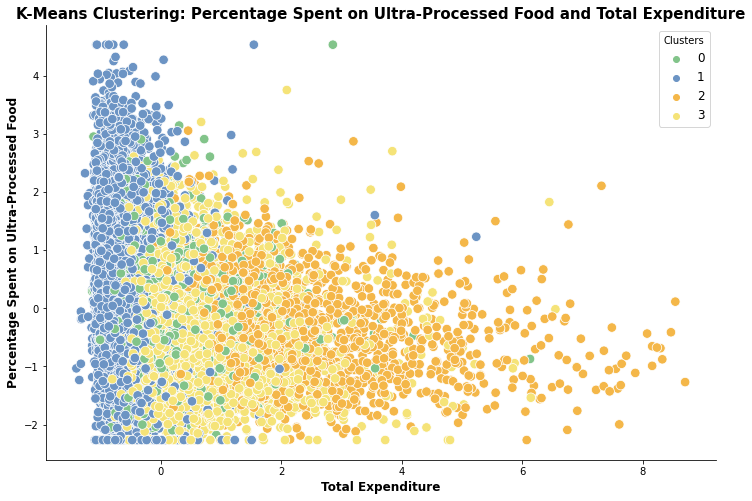

In [63]:
# Plot the clusters for the "%ultra_processed_food" and "W_total_expenditure" variables.

df = df_lcf_analysis_kmeans4
X = 'W_total_expenditure'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749', '#F5E378']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans4.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Total Expenditure', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total Expenditure' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

plt.show()

<Figure size 432x288 with 0 Axes>

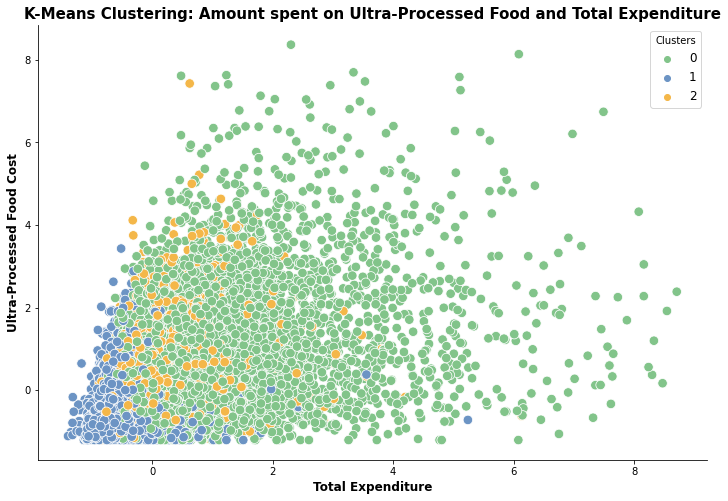

In [64]:
# Plot the clusters for the "W_ultra_processed_food" and "W_total_expenditure" variables.

# define data 
df = df_lcf_analysis_kmeans
X = 'W_total_expenditure'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Amount spent on Ultra-Processed Food and Total Expenditure', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total Expenditure' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_exp.png", bbox_inches='tight')

The largest cluster (1-blue)) contains the households with the lowest amount to spend and they also spend less on ultra-processed foods.

<Figure size 432x288 with 0 Axes>

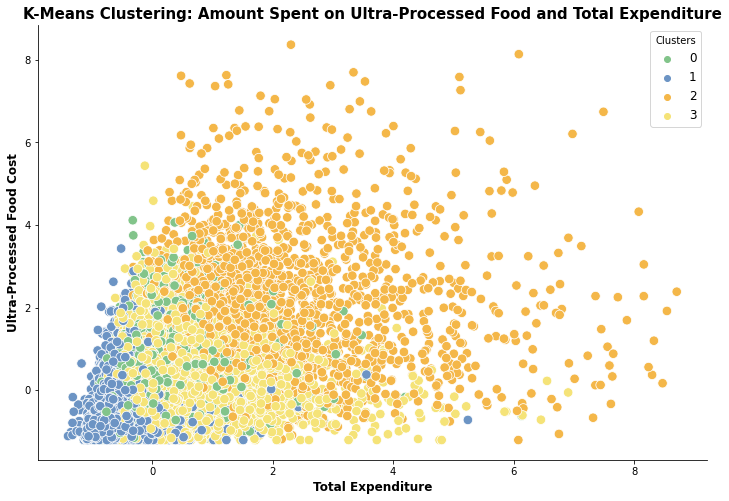

In [65]:
# Plot the clusters for the "W_ultra_processed_food" and "W_total_expenditure" variables.

df = df_lcf_analysis_kmeans4
X = 'W_total_expenditure'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749', '#F5E378']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans4.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Amount Spent on Ultra-Processed Food and Total Expenditure', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total Expenditure' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

plt.show()

**The optimal number of clusters is 3.**

### Comparing W_ultra_processed_food'

<Figure size 432x288 with 0 Axes>

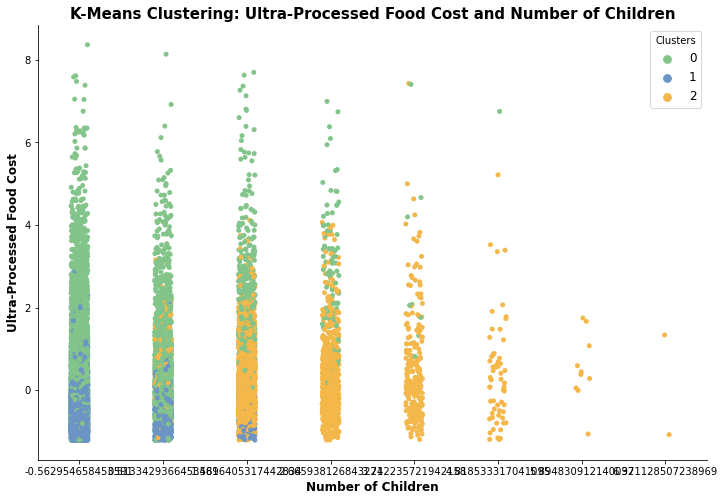

In [66]:
# Plot the clusters for the "W_ultra_processed_food" and "no_children" variables.

df = df_lcf_analysis_kmeans
X = 'no_children'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Number of Children', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of Children' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_child.png", bbox_inches='tight')

**It would appear that the largest cluster (1-blue) have fewer children and spend less on ultra-processed food compared to the other two clusters. The smallest cluster (2-ornage) have more children**

<Figure size 432x288 with 0 Axes>

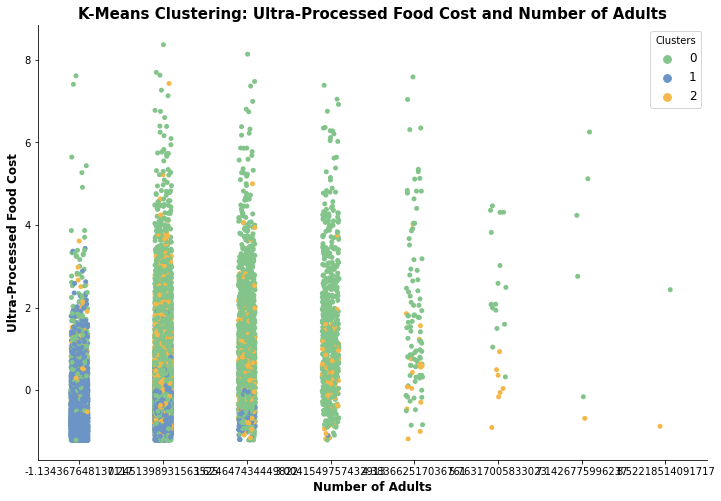

In [67]:
# Plot the clusters for the "W_ultra_processed_food" and "no_adult" variables.

df = df_lcf_analysis_kmeans
X = 'no_adult'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Number of Adults', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of Adults' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_adult.png", bbox_inches='tight')

**It would appear that the largest cluster group (1-blue) also have fewer adults in the household and spend less on ultra-processed food compared to the other two clusters.**

<Figure size 432x288 with 0 Axes>

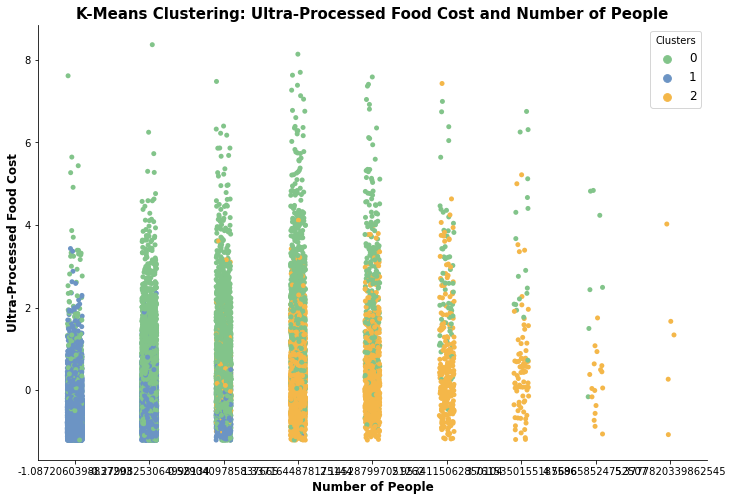

In [68]:
# Plot the clusters for the "W_ultra_prcoessed_food" and "no_people" variables.

df = df_lcf_analysis_kmeans
X = 'no_people'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Number of People', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of People' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_peop.png", bbox_inches='tight')

**The largest cluster dots (1-blue) has fewer people in the household, which would agree with the findings above, and as the number of people increases this group spends less on ultra-processed food compared to the other two clusters.**

<Figure size 432x288 with 0 Axes>

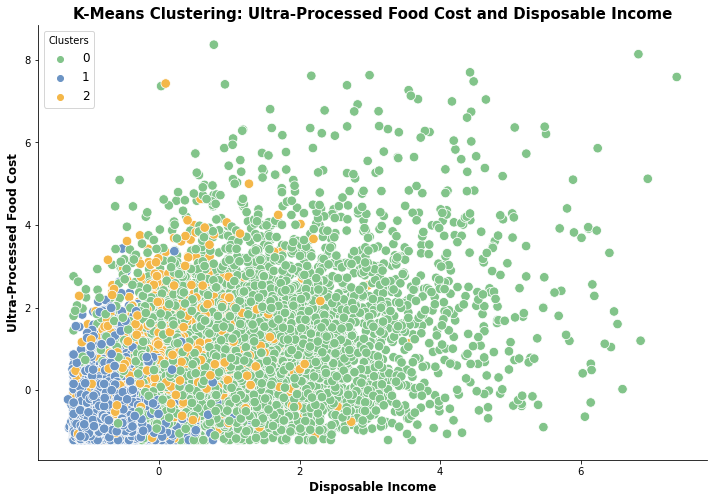

In [69]:
# Plot the clusters for the "W-ultra_processed_food" and "W_disposable_income" variables.

df = df_lcf_analysis_kmeans
X = 'W_disposable_income'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Disposable Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Disposable Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper left', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_dinc.png", bbox_inches='tight')

**The largest cluster (1-blue) has less disposable income and spends less on ultra-processed food compared to the other clusters.**

<Figure size 432x288 with 0 Axes>

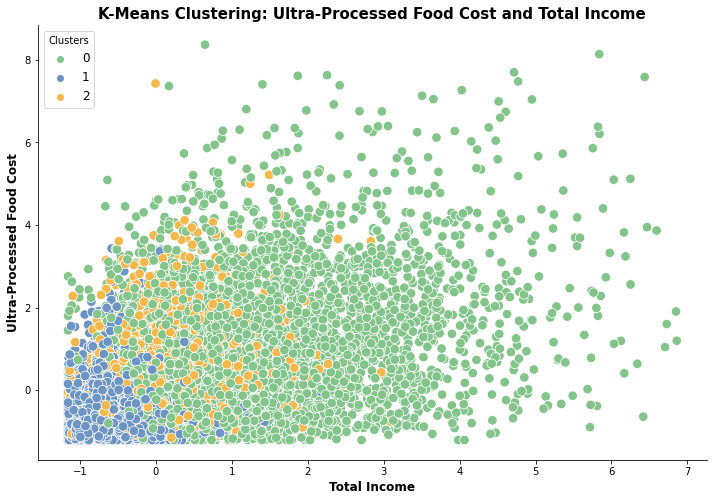

In [70]:
# Plot the clusters for the "W-ultra_processed_food" and "W_total_income" variables.

df = df_lcf_analysis_kmeans
X = 'W_total_income'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Total Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper left', fontsize = 12)

plt.show()

**The largest cluster (1-blue) has less total income and spends less on ultra-processed food compared to the other clusters.**

<Figure size 432x288 with 0 Axes>

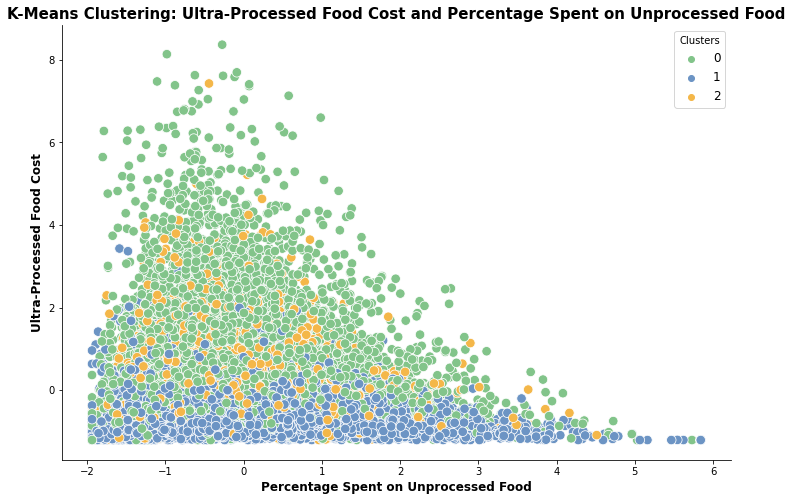

In [71]:
# Plot the clusters for the "W_ultra_processed_food" and "%unprocessed_food" variables.

df = df_lcf_analysis_kmeans
X = '%unprocessed_food'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Percentage Spent on Unprocessed Food', fontsize = 15, fontweight = 'bold')
plt.xlabel('Percentage Spent on Unprocessed Food' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

plt.show()

There is greater variation in the percentage spent on ultra-processed foods in households that spend less on ultra-processed food - this is the largest cluster (1-blue). As the amount spent on ultra-processed food increases there is less variation in the percentage spent on processed food. 

<Figure size 432x288 with 0 Axes>

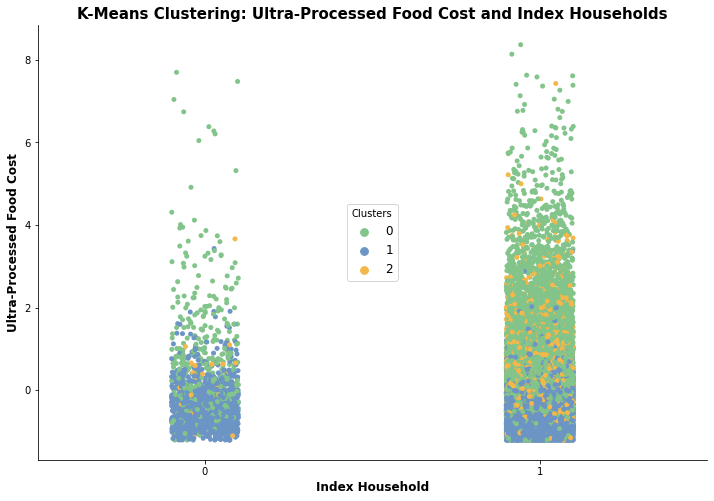

In [72]:
# Plot the clusters for the "W_ultra_processed_food" and "household_type_Index" variables.

df = df_lcf_analysis_kmeans
X = 'household_type_Index'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Index Households', fontsize = 15, fontweight = 'bold')
plt.xlabel('Index Household' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_indexht.png", bbox_inches='tight')

Most of the households in cluster 2 (orange) the smallest group in terms of size are nearly all Index households.

<Figure size 432x288 with 0 Axes>

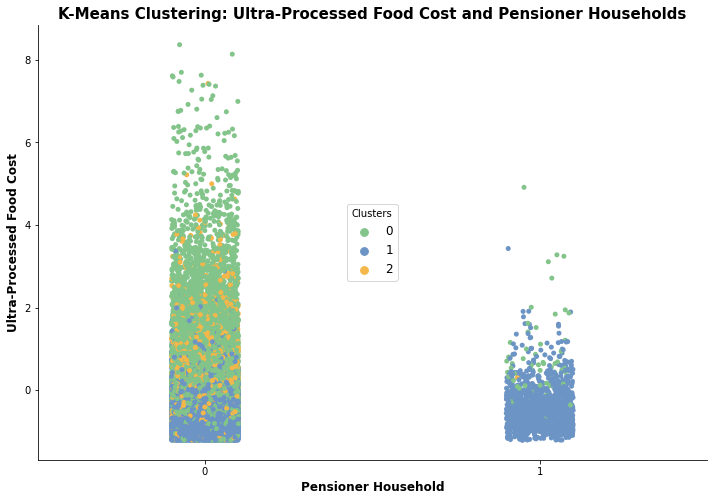

In [73]:
# Plot the clusters for the "W_ultra_processed_food" and "household_type_Pensioner" variables.

df = df_lcf_analysis_kmeans
X = 'household_type_Pensioner'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Pensioner Households', fontsize = 15, fontweight = 'bold')
plt.xlabel('Pensioner Household' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_penht.png", bbox_inches='tight')

**It would appear that most of the households in cluster 2 the smallest group (orange) are not pensioner households. Pensioner households are mainly in the largest cluster group (1-blue) and this group spends less on ultra processed food.**

<Figure size 432x288 with 0 Axes>

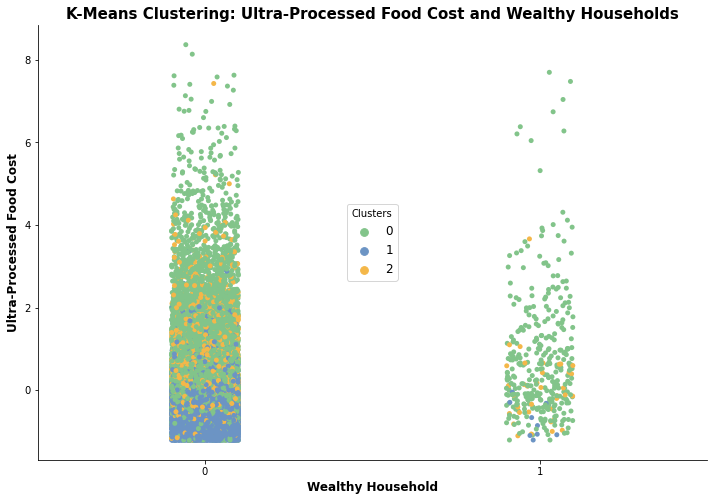

In [74]:
# Plot the clusters for the "W_ultra_processed_food" and "'household_type_Wealthy'" variables.

df = df_lcf_analysis_kmeans
X = 'household_type_Wealthy'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Wealthy Households', fontsize = 15, fontweight = 'bold')
plt.xlabel('Wealthy Household' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_wealthht.png", bbox_inches='tight')

**It would appear that most of the households in the largest cluster (1-blue) are not wealthy households. Wealthy households are mainly in the middle cluster (1-blue)**

<Figure size 432x288 with 0 Axes>

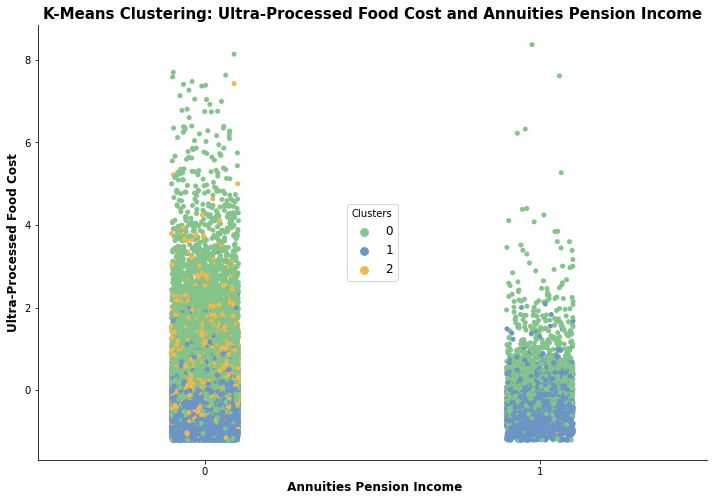

In [75]:
# Plot the clusters for the "W_ultra_processed_food" and "income_source_Annuities pensions" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Annuities pensions'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Annuities Pension Income', fontsize = 15, fontweight = 'bold')
plt.xlabel(' Annuities Pension Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_annpeninc.png", bbox_inches='tight')

**It would appear that the households in cluster 2 the smallest group (orange) do not earn their income from annuities and pensions. As a group households with income from annuities and pensions spend less on ultra processed food.**

<Figure size 432x288 with 0 Axes>

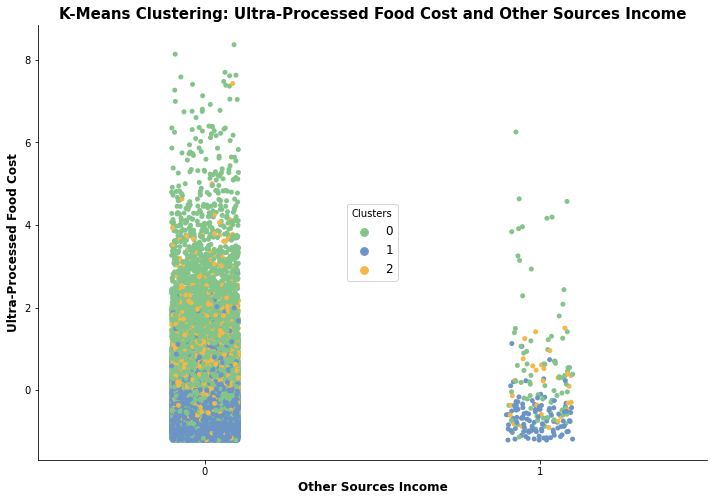

In [76]:
# Plot the clusters for the "W_ultra_processed_food" and "income_source_Income-other sources" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Income-other sources'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Other Sources Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Other Sources Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

plt.show()

<Figure size 432x288 with 0 Axes>

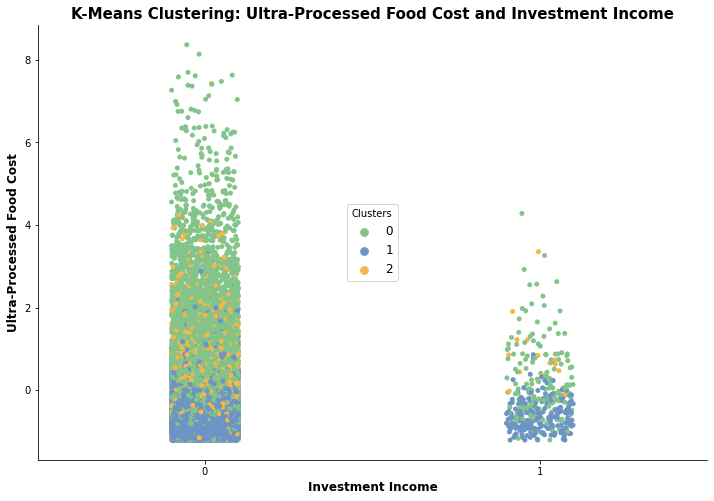

In [77]:
# Plot the clusters for the "W_ultra_processed_food" and "income_source_Investment income" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Investment income'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Investment Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Investment Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

plt.show()

As a group households whose income comes from other investment spend less on ultra-processed food.

<Figure size 432x288 with 0 Axes>

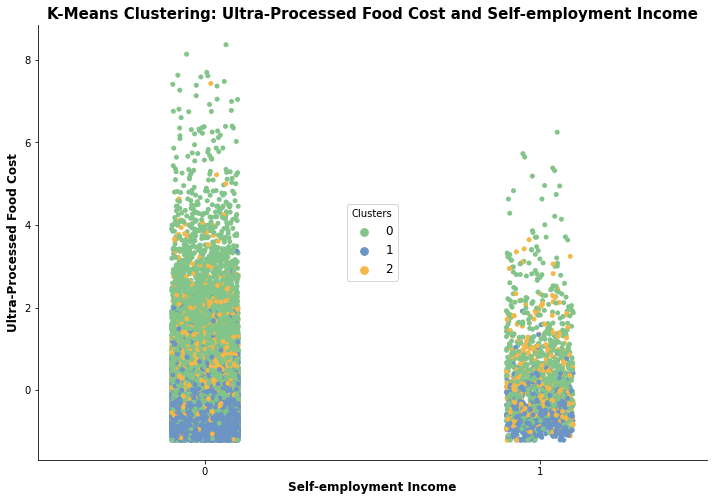

In [78]:
# Plot the clusters for the "W_ultra_processed_food" and "income_source_Self-employment inc." variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Self-employment inc.'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Self-employment Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Self-employment Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

plt.show()

<Figure size 432x288 with 0 Axes>

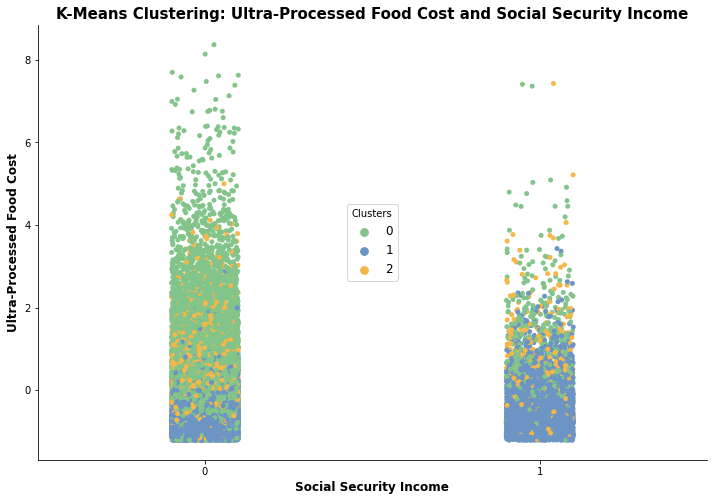

In [79]:
# Plot the clusters for the "W_ultra_processed_food" and "income_source_Social sec. benefits" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Social sec. benefits'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Social Security Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Social Security Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_ultra_socsecinc.png", bbox_inches='tight')

As a group households whose income comes from Social Security benefits are mainly in the largest cluster (1-blue).

<Figure size 432x288 with 0 Axes>

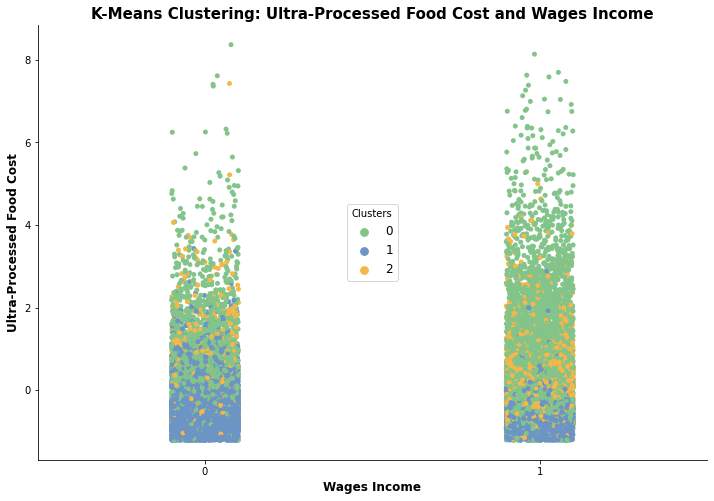

In [80]:
# Plot the clusters for the "W_ultra_processed_food" and "income_source_Wages salaries" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Wages salaries'
Y = 'W_ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Ultra-Processed Food Cost and Wages Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Wages Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Ultra-Processed Food Cost', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc = 'center', fontsize = 12)

plt.show()

### Comparing %ultra_processed_food'

<Figure size 432x288 with 0 Axes>

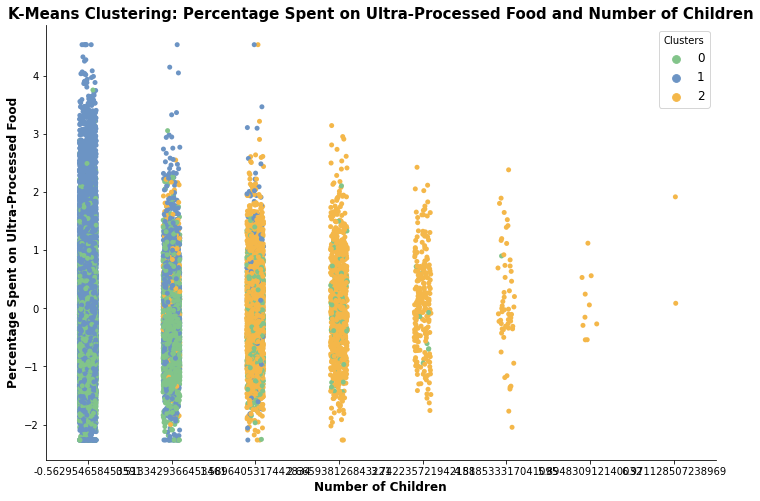

In [81]:
# Plot the clusters for the "%ultra_processed_food" and "no_children" variables.

df = df_lcf_analysis_kmeans
X = 'no_children'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Number of Children', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of Children' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_perultra_child.png", bbox_inches='tight')

Households in the largest cluster (1-blue) have fewer children and those in the smallest cluster (2-orange) have the most.

<Figure size 432x288 with 0 Axes>

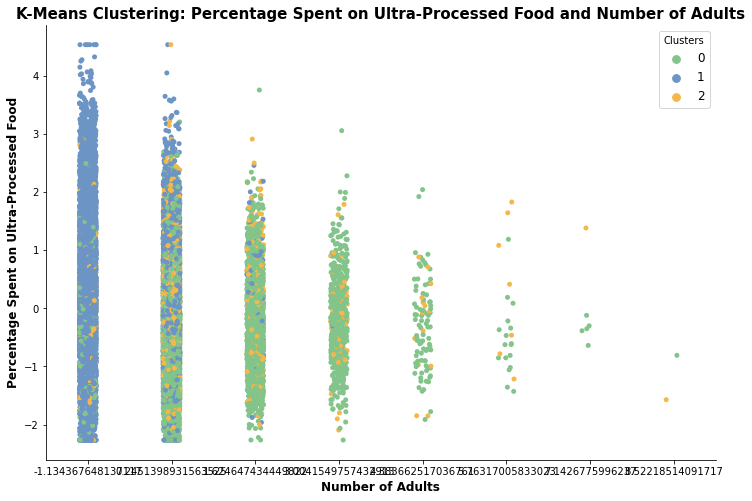

In [82]:
# Plot the clusters for the "%ultra_processed_food" and "no_adult" variables.

df = df_lcf_analysis_kmeans
X = 'no_adult'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Number of Adults', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of Adults' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_perultra_adults.png", bbox_inches='tight')

It would appear that the largest group (1-blue) tends to have fewer adults in the household and the percentage spent on ultra-processed food has a greater range compared to the other two clusters.

<Figure size 432x288 with 0 Axes>

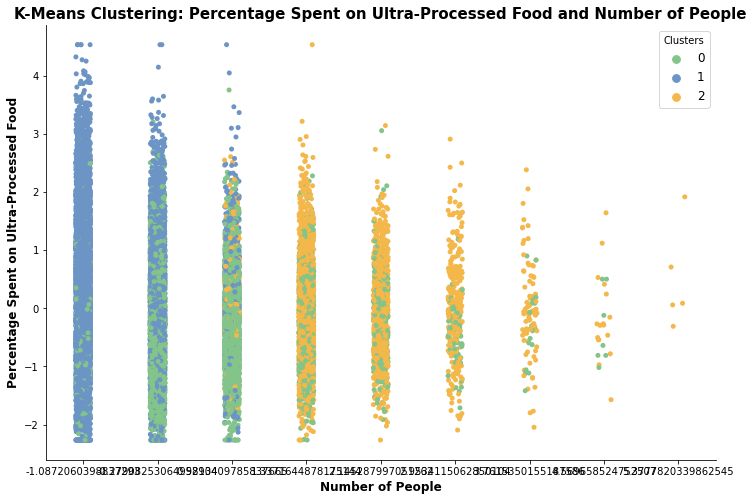

In [83]:
# Plot the clusters for the "%ultra_prcoessed_food" and "no_people" variables.

df = df_lcf_analysis_kmeans
X = 'no_people'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Number of People', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of People' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

plt.show()

The largest cluster (0-green) has fewer people and the smallest lcuster (2-orange) has the most.

<Figure size 432x288 with 0 Axes>

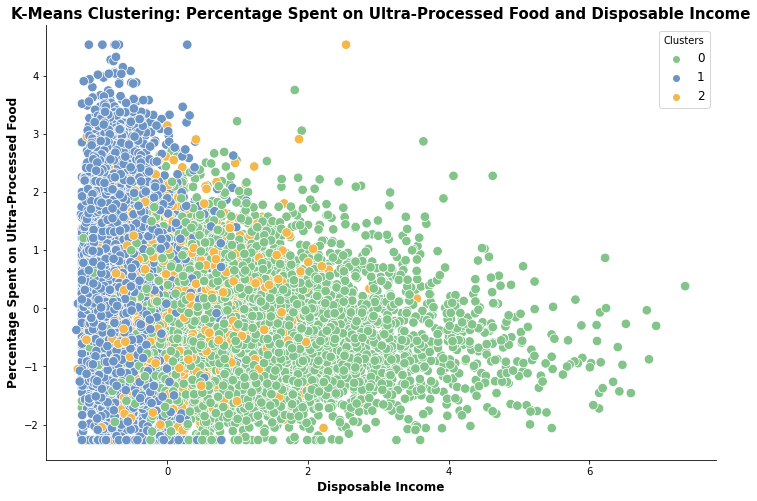

In [84]:
# Plot the clusters for the "%ultra_processed_food" and "W_disposable_income" variables.

df = df_lcf_analysis_kmeans
X = 'W_disposable_income'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Disposable Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Disposable Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

plt.show()

**The largest cluster (1-blue) has less disposable income compared to the other clusters**

<Figure size 432x288 with 0 Axes>

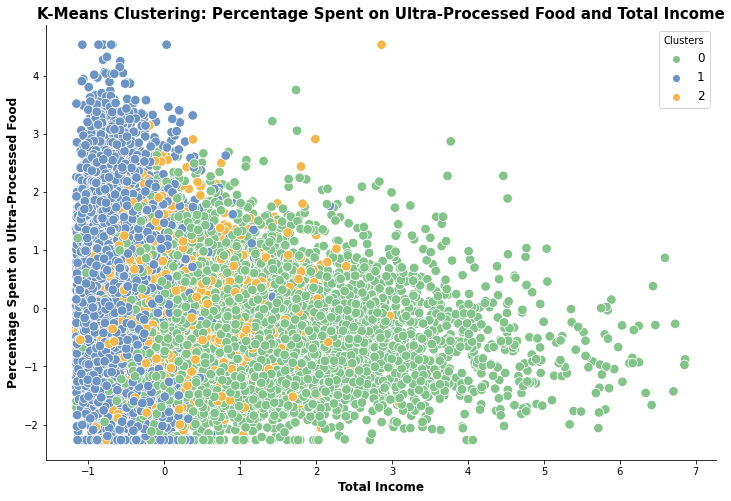

In [85]:
# Plot the clusters for the %ultra_processed_food" and "W_total_income" variables.

df = df_lcf_analysis_kmeans
X = 'W_total_income'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors, s = 90) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Total Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='upper right', fontsize = 12)

plt.show()

**The largest cluster (1-blue) has less total income compared to the other clusters.**

<Figure size 432x288 with 0 Axes>

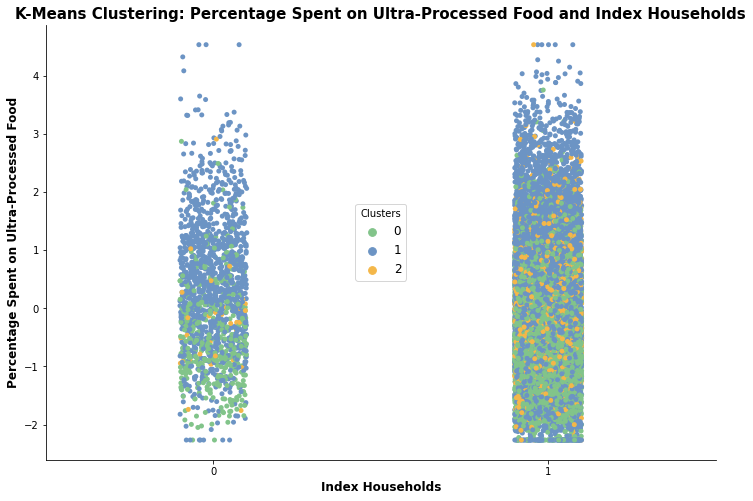

In [86]:
# Plot the clusters for the "%ultra_processed_food" and "household_type_Index" variables.

df = df_lcf_analysis_kmeans
X = 'household_type_Index'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Index Households', fontsize = 15, fontweight = 'bold')
plt.xlabel('Index Households' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

plt.show()

It would appear that most of the households in cluster 2 (orange) the smallest groups in terms of size are Index households.

<Figure size 432x288 with 0 Axes>

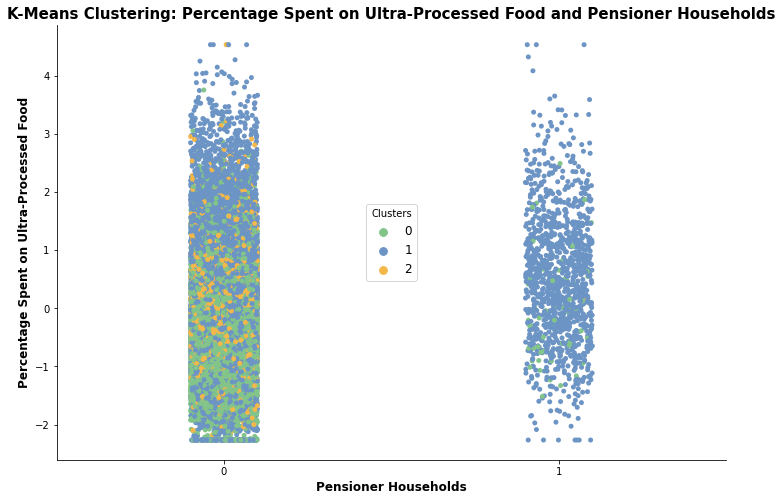

In [87]:
# Plot the clusters for the "%ultra_processed_food" and "household_type_Pensioner" variables.

df = df_lcf_analysis_kmeans
X = 'household_type_Pensioner'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Pensioner Households', fontsize = 15, fontweight = 'bold')
plt.xlabel('Pensioner Households' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_perultra_penht.png", bbox_inches='tight')

**It would appear that most of the households in cluster 2 the smallest group (orange) are not pensioner households.**

<Figure size 432x288 with 0 Axes>

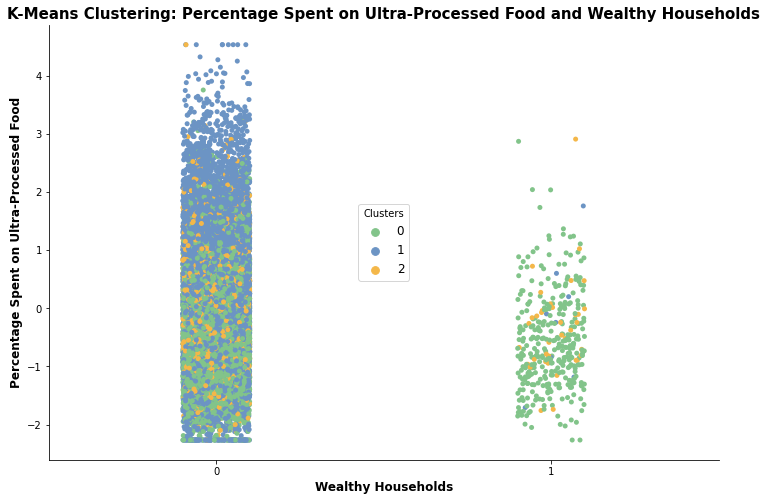

In [88]:
# Plot the clusters for the "W%ltra_processed_food" and "'household_type_Wealthy'" variables.

df = df_lcf_analysis_kmeans
X = 'household_type_Wealthy'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Wealthy Households', fontsize = 15, fontweight = 'bold')
plt.xlabel('Wealthy Households' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_perultra_wealthht.png", bbox_inches='tight')

**It would appear that most of the households in the largest cluster (1-blue) are not wealthy households.**

<Figure size 432x288 with 0 Axes>

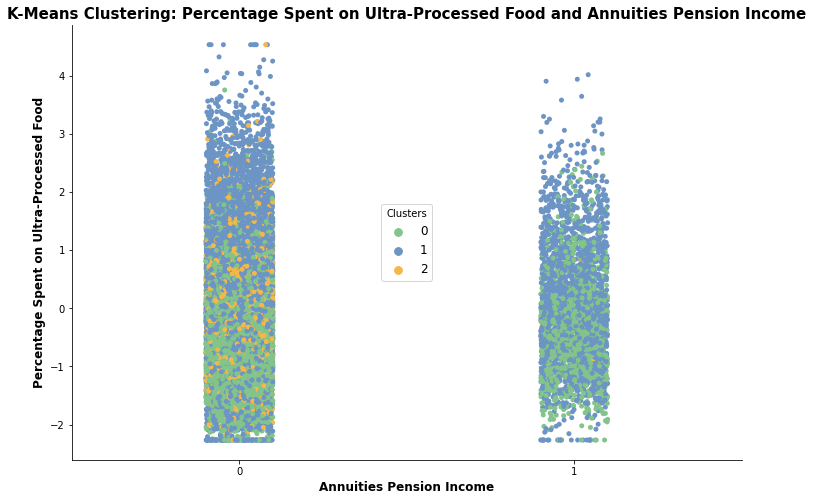

In [89]:
# Plot the clusters for the "%ultra_processed_food" and "income_source_Annuities pensions" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Annuities pensions'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Annuities Pension Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Annuities Pension Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_perultra_annpeninc.png", bbox_inches='tight')

**Households in cluster 2 the smallest group (orange) do not earn income from annuities and pensions.**

<Figure size 432x288 with 0 Axes>

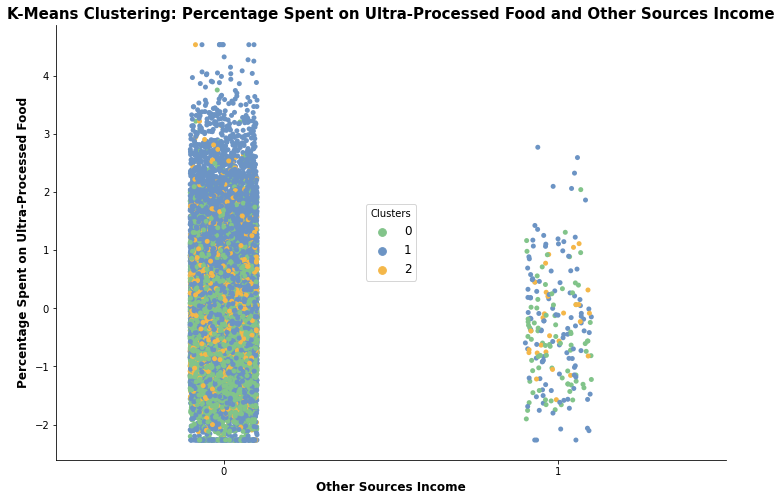

In [90]:
# Plot the clusters for the "%ultra_processed_food" and "income_source_Income-other sources" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Income-other sources'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Other Sources Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Other Sources Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

plt.show()

<Figure size 432x288 with 0 Axes>

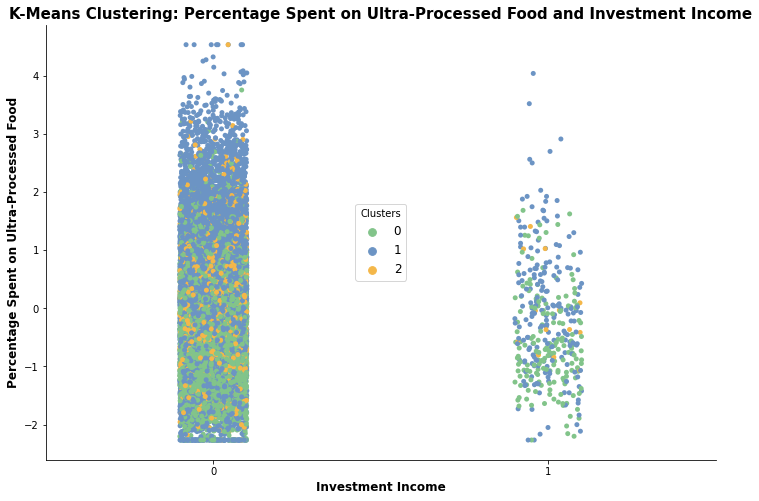

In [91]:
# Plot the clusters for the "%ultra_processed_food" and "income_source_Investment income" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Investment income'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Investment Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Investment Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

plt.show()

<Figure size 432x288 with 0 Axes>

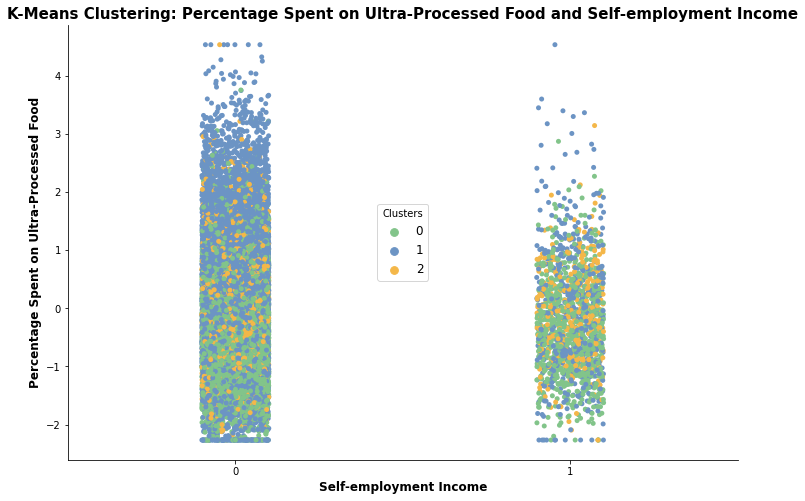

In [92]:
# Plot the clusters for the "W_ultra_processed_food" and "income_source_Self-employment inc." variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Self-employment inc.'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Self-employment Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Self-employment Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

plt.show()

<Figure size 432x288 with 0 Axes>

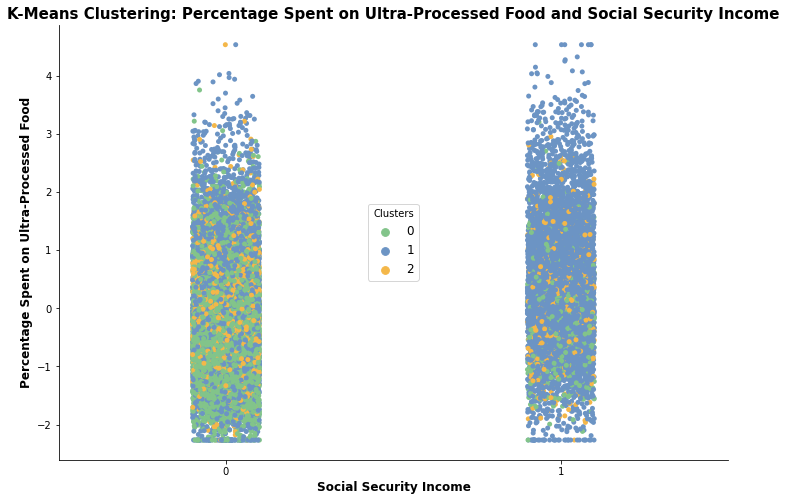

In [93]:
# Plot the clusters for the "%ultra_processed_food" and "income_source_Social sec. benefits" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Social sec. benefits'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Social Security Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Social Security Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

# Exporting the scatter plot with axis showing
plt.savefig("cluster_perultra_socsecinc.png", bbox_inches='tight')

Households whose income comes from Social Security Benefits are mainly in the largest cluster group (1-blue).

<Figure size 432x288 with 0 Axes>

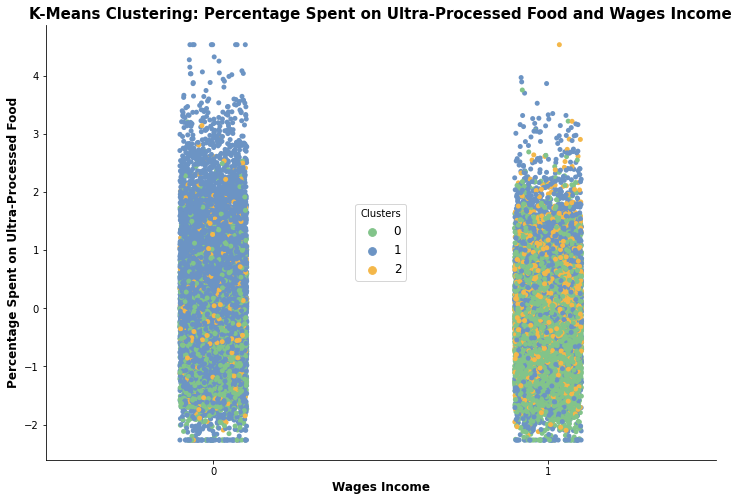

In [94]:
# Plot the clusters for the "W_ultra_processed_food" and "income_source_Wages salaries" variables.

df = df_lcf_analysis_kmeans
X = 'income_source_Wages salaries'
Y = '%ultra_processed_food'

# set plot layout and colors
plt.tight_layout()
colors = ['#82C48A', '#6C94C4', '#F4B749']

plt.figure(figsize=(12,8))
ax = sns.stripplot(x = df[X], y = df[Y], hue = kmeans.labels_, palette = colors) 

# Remove grid from the background
ax.grid(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis and legends
plt.title('K-Means Clustering: Percentage Spent on Ultra-Processed Food and Wages Income', fontsize = 15, fontweight = 'bold')
plt.xlabel('Wages Income' , fontsize = 12, fontweight = 'semibold')
plt.ylabel('Percentage Spent on Ultra-Processed Food', fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Clusters', loc='center', fontsize = 12)

plt.show()

## 09. Descriptive Analysis of Clusters

In [95]:
# Add a columm/flag for the colour of the cluster
df_lcf_analysis_kmeans.loc[df_lcf_analysis_kmeans['clusters'] == 2, 'cluster'] = 'orange'
df_lcf_analysis_kmeans.loc[df_lcf_analysis_kmeans['clusters'] == 1, 'cluster'] = 'blue'
df_lcf_analysis_kmeans.loc[df_lcf_analysis_kmeans['clusters'] == 0, 'cluster'] = 'green'

In [96]:
# set the option to display all the columns and show the mean and median grouped by cluster
pd.set_option('display.max_columns', None)
df_lcf_analysis_kmeans.groupby('cluster').agg({'no_people':['mean', 'median'], 
                         'no_children':['mean', 'median'], 
                         'no_adult':['mean', 'median'],
                        'W_total_income':['mean', 'median'],
                        'W_disposable_income':['mean', 'median'], 
                        'W_total_food_cost': ['mean', 'median'],
                        'W_total_expenditure': ['mean', 'median'],
                        'W_unprocessed_food': ['mean', 'median'],
                        'W_ultra_processed_food': ['mean', 'median'],
                        '%unprocessed_food': ['mean', 'median'],
                        '%ultra_processed_food': ['mean', 'median']})

no_people           no_children            no_adult            \
             mean    median        mean    median      mean    median   
cluster                                                                 
blue    -0.665625 -1.087206   -0.441955 -0.562955 -0.569794 -1.134368   
green    0.202855 -0.279083   -0.200620 -0.562955  0.603423  0.245140   
orange   1.581938  1.337164    1.895541  1.589641  0.270902  0.245140   

        W_total_income           W_disposable_income            \
                  mean    median                mean    median   
cluster                                                          
blue         -0.610719 -0.668173           -0.624207 -0.674587   
green         0.774056  0.465656            0.792449  0.509724   
orange       -0.030494 -0.148294           -0.034439 -0.133546   

        W_total_food_cost           W_total_expenditure            \
                     mean    median                mean    median   
cluster                                                             
blue            -0.611560 -0.659599           -0.573003 -0.639576   
green            0.714202  0.405172            0.721913  0.387496   
orange           0.123018  0.017468           -0.017672 -0.140209   

        W_unprocessed_food           W_ultra_processed_food            \
                      mean    median                   mean    median   
cluster                                                                 
blue             -0.503972 -0.597192              -0.497377 -0.589598   
green             0.600073  0.310865               0.536082  0.246285   
orange            0.072348 -0.074866               0.212904  0.075399   

        %unprocessed_food           %ultra_processed_food            
                     mean    median                  mean    median  
cluster                                                              
blue             0.102692 -0.006116              0.269714  0.196424  
green           -0.078637 -0.202550             -0.336628 -0.387608  
orange          -0.124733 -0.236897              0.000309 -0.040415

## 10. Insights and Future Steps

* The green cluster (middle sized group) has the highest total and disposable income and spends more than the other two cluster groups. This cluster contains most of the wealthy hosuholds. The percentage of their food budget that is spent on ultra-processed foods is less than the other two cluster groups. 
* The blue cluster (largest group) has fewer people in the household (both children and adults) than the other groups, the lowest total and disposable income and spends less than the other two cluster groups. These households spend more of their total food budget on ultra-processed food than the other clusters. The majority of households in the green cluster mainly recieve their income from Social Security Benefits and Pensions Annuities. The households in this group are not classified as wealthy and there is less variation between the households in this group, than the other two groups.
* The orange cluster (smallest group) has the highest number of people in the household due to the number of children. This group has the largest variation between households. Their income comes mainly from Wages, Social Security Benefits and Self Employment and not from Pensions and Annuities. There are no Pensioner households in this group mostly Index and some Wealthy households.

**Future Steps** <br>
These results have helped to clarify and confirm which households (Wealthy and Pensioner) and incomes (Social Security Benefits and Pensions Annuities) to focus on in the next steps of the analysis.

*It should be noted that the analysis does not include drinks and food consumed outwith the home, which may account for households spending a lower percentage on unprocessed and ultra-processed foods in the blue and orange clusters.*

## 11. Merge the Cluster Column onto the Original Data Set

In [97]:
df_lcf_analysis['clusters'] = df_lcf_analysis_kmeans['clusters']
df_lcf_analysis['cluster'] = df_lcf_analysis_kmeans['cluster']
df_lcf_analysis.head()

unique_id  no_people household_type            quarter  \
0          1          1          Index   January to March   
1          2          5          Index  July to September   
2          3          2          Index   January to March   
3          4          3          Index  July to September   
4          5          3          Index      April to June   

   OECD_disposable_income      region  total_income  OECD_scale  gross_income  \
0              173.270000        East    179.684359         1.0        173.27   
1              333.667857  North West   1117.340000         2.8       1117.34   
2              678.860000  North West   1269.120000         1.5        732.74   
3              180.000000  South East    391.475289         1.6        288.00   
4              375.455000  North West    922.302564         2.0        911.70   

   weekly_disposable_income         income_source  adult_food_cost  \
0                    173.27  Self-employment inc.           38.675   
1                    934.27        Wages salaries           60.670   
2                   1018.29        Wages salaries          127.435   
3                    288.00  Social sec. benefits           48.500   
4                    750.91        Wages salaries          135.770   

   child_food_cost  total_food_cost  adult_total_expenditure  \
0            0.000           38.675                98.278236   
1            0.800           61.470               437.867812   
2            0.000          127.435               802.527055   
3            1.000           49.500               580.569766   
4           23.475          164.470               594.895641   

   child_total_expenditure  total_expenditure eng_rural_urb scot_rural_urb  \
0                    0.000          98.278236         Rural            NaN   
1                    3.800         441.667812         Urban            NaN   
2                    0.000         802.527055         Urban            NaN   
3                    1.000         581.569766         Urban            NaN   
4                   38.465         638.585641         Urban            NaN   

   quarterly_weight  year  no_children  no_adult  unprocessed_food  \
0         25.550684  2016            0         1            14.600   
1         30.114910  2015            1         4            10.735   
2         21.164147  2016            0         2            35.370   
3         15.847543  2015            2         1            14.155   
4         15.858930  2015            1         2            12.380   

   processed_food  ultra_processed_food  no_households  \
0           0.275                21.715          25550   
1           1.300                26.210          30114   
2           6.290                35.475          21164   
3           3.880                11.975          15847   
4           4.110                54.445          15858   

   W_OECD_disposable_income  W_total_income  W_gross_income  \
0               4427.167040     4591.058300     4427.167040   
1              10048.377621    33648.593987    33648.593987   
2              14367.493149    26859.842833    15507.817415   
3               2852.557690     6203.921362     4564.092304   
4               5954.314567    14626.731813    14458.586491   

   W_disposable_income  W_adult_food_cost  W_child_food_cost  \
0          4427.167040         988.172709           0.000000   
1         28135.457340        1827.071614          24.091928   
2         21551.239724        2697.053132           0.000000   
3          4564.092304         768.605822          15.847543   
4         11908.629135        2153.166928         372.288382   

   W_total_food_cost  W_adult_total_expenditure  W_child_total_expenditure  \
0         988.172709                2511.076176                   0.000000   
1        1851.163542               13186.349938                 114.436660   
2        2697.053132               16984.800931                   0.000000   
3         784.453365        

## 12. Exporting the Cleaned Data Set for Tableau Analysis

In [98]:
# Change the main project folder path to the variable path
path = r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'
path

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

In [99]:
# Export the dataframe into the Prepared_Data folder as lcf_analysis_final.csv and lcf_analysis_final.pkl
df_lcf_analysis.to_csv(os.path.join(path, '02_Data','02_2_Prepared_Data', 'lcf_analysis_final.csv'))